In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
sns.set_style("darkgrid")
#from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import re, string, nltk
#import emoji, bz2
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('/processed_reviews_split_surnamesWXYZ_minimal.csv')
df.head()

,review_id,text,verified,review_score,product_category
0,product_review_000000,Rainbow Six Vegas 2 was well worth the wait. ...,False,5.0,video_games
1,product_review_000001,Works good.,True,4.0,video_games
2,product_review_000002,Great Product!. Great Product!,True,4.0,NaN
3,product_review_000003,"Other than metal shredders, I think most playe...",True,5.0,musical_instruments
4,product_review_000004,For those who may be too young to remember or ...,False,5.0,video_games


In [6]:
df.shape

(32917, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32917 entries, 0 to 32916
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         32917 non-null  object 
 1   text              32904 non-null  object 
 2   verified          32797 non-null  object 
 3   review_score      32917 non-null  float64
 4   product_category  32011 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


In [8]:
import seaborn as sns

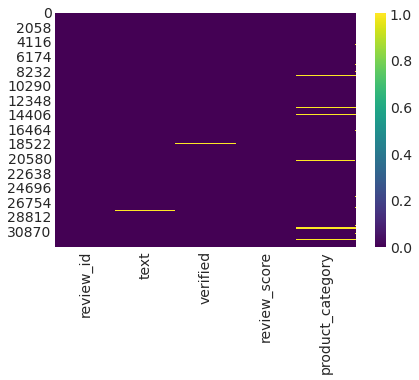

In [9]:
sns.heatmap(df.isnull(), cmap = 'viridis')

In [10]:
df.product_category.isnull().sum()

906

In [11]:
df.product_category.value_counts()

video_games            21797
musical_instruments    10214
Name: product_category, dtype: int64

In [12]:
df.verified.value_counts()

True     23326
False     9471
Name: verified, dtype: int64

In [13]:
df.shape[0] - df.text.isna().sum()


32904

In [14]:
df.text[-5:]

32912    As large ultex thumb picks goes,\n1 these felt...
32913    From the ring to the parking lot all the way t...
32914                                               Bien. 
32915    I love this game. Brings me back to my childho...
32916    I just can't deny Summon Night:  Twin Age's ch...
Name: text, dtype: object

In [15]:
nans = np.where(df.text.isnull() == True)[0]
nans

array([ 2489, 10288, 10819, 13598, 18862, 20328, 22092, 22103, 23390,
       25692, 26608, 27178, 27882])

In [16]:
df = df[["text","review_score"]]
df

,text,review_score
0,Rainbow Six Vegas 2 was well worth the wait. ...,5.0
1,Works good.,4.0
2,Great Product!. Great Product!,4.0
3,"Other than metal shredders, I think most playe...",5.0
4,For those who may be too young to remember or ...,5.0
...,...,...
32912,"As large ultex thumb picks goes,\n1 these felt...",3.0
32913,From the ring to the parking lot all the way t...,5.0
32914,Bien.,4.0
32915,I love this game. Brings me back to my childho...,5.0


In [17]:
df.drop(nans, axis = 0, inplace = True)

In [18]:
df.isnull().sum()

text            0
review_score    0
dtype: int64

In [19]:
np.where(df.text.duplicated() == True)[0]

array([  566,   825,  1221, ..., 32881, 32891, 32903])

In [20]:
df.review_score.unique()

array([ 5.,  4.,  3.,  2., -1.,  1.])

In [21]:
df.drop(df.loc[df['review_score']==-1].index, inplace=True)

In [22]:
df.review_score.unique()

array([5., 4., 3., 2., 1.])

In [23]:
df.duplicated().sum()

1819

In [24]:
df.drop_duplicates(keep = 'first', inplace = True)

In [25]:
df.duplicated().sum()

0

In [26]:
df1 = df
df1.shape

(30178, 2)

In [27]:
df1.review_score.value_counts()

5.0    18166
4.0     5841
3.0     2955
1.0     1755
2.0     1461
Name: review_score, dtype: int64

In [28]:
df.columns
#df.product_category.value_counts()

Index(['text', 'review_score'], dtype='object')

In [29]:
def clean_text(df, field):
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.replace("#[^a-zA-Z0-9_]+"," ")
    df[field] = df[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    df[field] = df[field].str.replace(r"http\S+","")
    df[field] = df[field].str.lower()
    return df

clean_text(df1,"text")

,text,review_score
0,rainbow six vegas was well worth the wait ...,5.0
1,works good,4.0
2,great product great product,4.0
3,"other than metal shredders, i think most playe...",5.0
4,for those who may be too young to remember or ...,5.0
...,...,...
32911,great calibration tool,5.0
32912,"as large ultex thumb picks goes,\n these felt...",3.0
32913,from the ring to the parking lot all the way t...,5.0
32914,bien,4.0


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords

import os
#print(os.listdir("../input"))

In [31]:
#pip install emoji
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
pip install emoji

     |████████████████████████████████| 175 kB 5.0 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=008fc196a02008102f6d0fc101423b6beca0a390255e74cb254c7e7df516a6ae
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


This took 11 minutes

In [33]:
import emoji
# Applying Lemmmatizer to remove tenses from texts.
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub('[^a-zA-Z0-9]',' ',text)
    text= re.sub(emoji.get_emoji_regexp(),"",text)
    text = [lemmatizer.lemmatize(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

df1["clean_text"] = df1["text"].apply(preprocess_text)

In [34]:
df1.head()

,text,review_score,clean_text
0,rainbow six vegas was well worth the wait ...,5.0,rainbow six vega well worth wait graphic much ...
1,works good,4.0,work good
2,great product great product,4.0,great product great product
3,"other than metal shredders, i think most playe...",5.0,metal shredder think player find particular se...
4,for those who may be too young to remember or ...,5.0,may young remember perhaps missed ne snes gene...


Text(0, 0.5, 'Text Length')

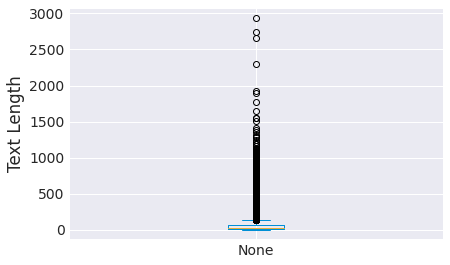

In [35]:
text_length = pd.Series([len(review.split()) for review in df1["clean_text"]])
text_length.plot(kind="box")
plt.ylabel("Text Length")

In [36]:
pip install wordcloud

In [37]:
text_length.describe()

count    30178.000000
mean        60.435118
std        109.866781
min          0.000000
25%         11.000000
50%         24.000000
75%         62.000000
max       2942.000000
dtype: float64

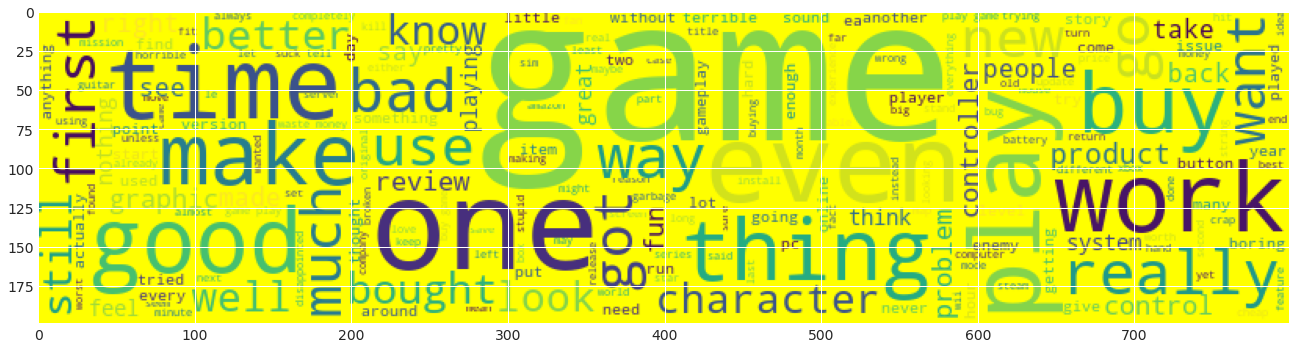

In [41]:
from wordcloud import WordCloud

# Negative Review WordCloud
plt.figure(figsize=(20,20))
wc1 = WordCloud(max_words=2000,min_font_size=6, height=200, width=800, 
               background_color="yellow").generate(" ".join(df1[df1["review_score"]==1].clean_text))
plt.imshow(wc1)

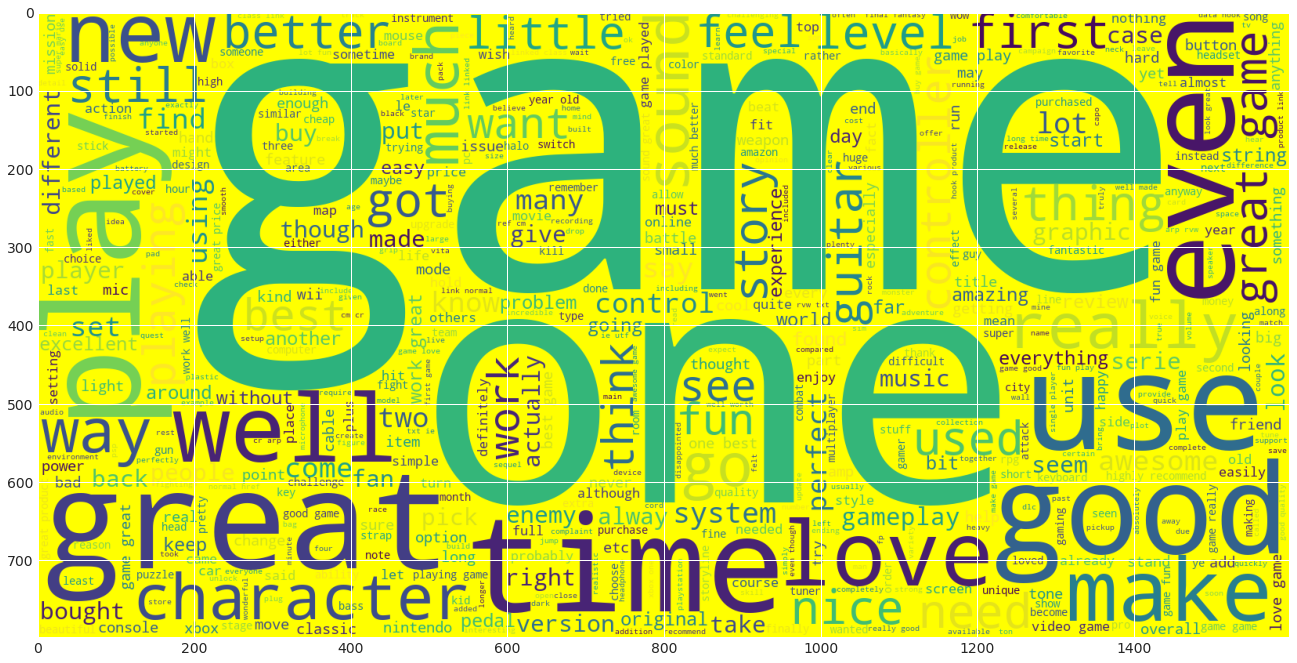

In [42]:
# Positive Review WordCloud
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000,min_font_size=10, height=800, width=1600, 
               background_color="yellow").generate(" ".join(df1[df1["review_score"]==5].clean_text))
plt.imshow(wc)

In [43]:
df = df1[["review_score","clean_text"]]
df.head(10)

,review_score,clean_text
0,5.0,rainbow six vega well worth wait graphic much ...
1,4.0,work good
2,4.0,great product great product
3,5.0,metal shredder think player find particular se...
4,5.0,may young remember perhaps missed ne snes gene...
5,3.0,well ive played like game far ive found decent...
6,4.0,play guitar got gift son although still love b...
7,4.0,first signal weak strong cable internet high s...
8,3.0,say steam game
9,4.0,first ace combat game ever played still think ...


In [44]:
len(df.clean_text), len(df.review_score)

(30178, 30178)

In [45]:
X_train, X_rest, y_train, y_rest = train_test_split(np.array(df["clean_text"]),np.array(df["review_score"]), test_size=0.30,random_state=49)
print(X_train.shape)
print(X_rest.shape)

(21124,)
(9054,)


In [46]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rest, y_rest, test_size = 0.5, random_state = 49)
X_test.shape, X_valid.shape

((4527,), (4527,))

In [47]:
X_train[0]

'client like'

In [48]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2 = TfidfVectorizer(use_idf=True, tokenizer=word_tokenize)
X_train_tf2 = tfidf2.fit_transform(X_train)
X_valid_tf2 = tfidf2.transform(X_valid)
X_test_tf2 = tfidf2.transform(X_test)

In [50]:
X_train_tf2.shape, X_valid_tf2.shape, X_test_tf2.shape

((21124, 36088), (4527, 36088), (4527, 36088))

In [51]:
X_train_tf2[0], X_valid_tf2[0], X_test_tf2[0]

(<1x36088 sparse matrix of type '<class 'numpy.float64'>'
 	with 2 stored elements in Compressed Sparse Row format>,
 <1x36088 sparse matrix of type '<class 'numpy.float64'>'
 	with 39 stored elements in Compressed Sparse Row format>,
 <1x36088 sparse matrix of type '<class 'numpy.float64'>'
 	with 13 stored elements in Compressed Sparse Row format>)

In [52]:
y_train = np.asarray(y_train).astype('float32')
y_valid = np.asarray(y_valid).astype('float32')
y_test = np.asarray(y_test).astype('float32')
print("y_train ", y_train.shape)
print("y_valid ", y_valid.shape)
print("y_test ", y_test.shape)

y_train  (21124,)
y_valid  (4527,)
y_test  (4527,)


In [53]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [54]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_valid_seq = tokenizer.texts_to_sequences(X_valid)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [55]:
X_train_seq_padded = pad_sequences(X_train_seq)
X_valid_seq_padded = pad_sequences(X_valid_seq)
X_test_seq_padded = pad_sequences(X_test_seq)

In [56]:
np.set_printoptions(threshold=np.inf)

In [57]:
X_train_seq_padded.shape, X_valid_seq_padded.shape, X_test_seq_padded.shape

((21124, 2942), (4527, 2269), (4527, 1822))

In [58]:
from sklearn.metrics import accuracy_score, classification_report

In [59]:
clf_rfc_1 = RandomForestClassifier(n_estimators = 50, max_features= 'auto', random_state = 0).fit(X_train_tf2, y_train)
y_hat_train_2 = clf_rfc_1.predict(X_train_tf2)
y_hat_valid_2 = clf_rfc_1.predict(X_valid_tf2)
print("The validation score for 50 estimators: ", clf_rfc_1.score(X_valid_tf2, y_valid))
print("The validation score for 50 estimators: ", clf_rfc_1.score(X_train_tf2, y_train))

The validation score for 50 estimators:  0.6220455047492821
The validation score for 50 estimators:  0.994650634349555


In [60]:
clf_rfc_2 = RandomForestClassifier(n_estimators = 150, max_features= 'auto', random_state = 0).fit(X_train_tf2, y_train)
y_hat_train_2 = clf_rfc_2.predict(X_train_tf2)
y_hat_valid_2 = clf_rfc_2.predict(X_valid_tf2)
print("The validation score for 150 estimators: ", clf_rfc_2.score(X_valid_tf2, y_valid))
print("The validation score for 150 estimators: ", clf_rfc_2.score(X_train_tf2, y_train))

The validation score for 150 estimators:  0.6189529489728297
The validation score for 150 estimators:  0.9947926529066464


In [61]:
clf_rfc_3 = RandomForestClassifier(n_estimators = 250, max_features= 'auto', random_state = 0).fit(X_train_tf2, y_train)
y_hat_train_2 = clf_rfc_3.predict(X_train_tf2)
y_hat_valid_2 = clf_rfc_3.predict(X_valid_tf2)
print("The validation score for 250 estimators: ", clf_rfc_3.score(X_valid_tf2, y_valid))
print("The validation score for 250 estimators: ", clf_rfc_3.score(X_train_tf2, y_train))

The validation score for 250 estimators:  0.6196156394963552
The validation score for 250 estimators:  0.9947926529066464


In [62]:
clf_rfc_4 = RandomForestClassifier(n_estimators = 500, max_features= 'auto', random_state = 0).fit(X_train_tf2, y_train)
y_hat_train_2 = clf_rfc_4.predict(X_train_tf2)
y_hat_valid_2 = clf_rfc_4.predict(X_valid_tf2)
print("The validation score for 500 estimators: ", clf_rfc_4.score(X_valid_tf2, y_valid))
print("The validation score for 500 estimators: ", clf_rfc_4.score(X_train_tf2, y_train))

The validation score for 500 estimators:  0.6198365363375303
The validation score for 500 estimators:  0.9947926529066464


In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
naive = MultinomialNB()
naive.fit(X_train_tf2, y_train)

MultinomialNB()

In [64]:
naive1 = BernoulliNB()
naive1.fit(X_train_tf2, y_train)

BernoulliNB()

In [65]:
naive2 = ComplementNB()
naive2.fit(X_train_tf2, y_train)

ComplementNB()

In [66]:
n_pred = naive.predict(X_valid_tf2)

In [67]:
n_pred1 = naive1.predict(X_valid_tf2)

In [68]:
n_pred2 = naive2.predict(X_valid_tf2)

In [69]:
accuracy_score(n_pred, y_valid)

0.6083499005964215

In [70]:
accuracy_score(n_pred1, y_valid)

0.5734481996907445

In [71]:
accuracy_score(n_pred2, y_valid)

0.6200574331787055

In [72]:
print(X_test[950], y_test[950])
print('\n')
print('The original score was ', y_test[950], 'and the predicted score was ', clf_rfc_1.predict(X_test_tf2[950]))

ur looking decent cheap gaming headset would much turtle beach fan needed decent headset pc gaming headset already p astro basically looking cheap headset microphone arrived plastic packaging box took headset feel cheap plastic eh feel like could break time soon wit price 3.0


The original score was  3.0 and the predicted score was  [5.]


In [74]:
print(X_test[12], y_test[50])
print('\n')
print('The original score was ', y_test[950], 'and the predicted score was ', clf_rfc_1.predict(X_test_tf2[950]))

nice knob 4.0


The original score was  3.0 and the predicted score was  [5.]


In [81]:
print(X_test[450], y_test[450])
print('\n')
print('The original score was ', y_test[450], 'and the predicted score was ', clf_rfc_1.predict(X_test_tf2[450]))

hate remastered game last u great game great like way ign hyped great game lived world p exists game except remastered game last gen system played get wrong remastered called f give u money 4.0


The original score was  4.0 and the predicted score was  [5.]


In [82]:
print(X_test[11], y_test[11])
print('\n')
print('The original score was ', y_test[11], 'and the predicted score was ', clf_rfc_1.predict(X_test_tf2[11]))

love much wait play good game love 5.0


The original score was  5.0 and the predicted score was  [5.]


In [83]:
print(X_test[10], y_test[10])
print('\n')
print('The original score was ', y_test[10], 'and the predicted score was ', clf_rfc_1.predict(X_test_tf2[10]))

lot fun love game fun 5.0


The original score was  5.0 and the predicted score was  [5.]


In [84]:
print(X_test[345], y_test[345])
print('\n')
print('The original score was ', y_test[345], 'and the predicted score was ', clf_rfc_1.predict(X_test_tf2[345]))

playing super mario kart super nintendo great mario kart hella better mario kart double dash take game whole new level game somewhat vein super smash bros melee sense plenty unlock time around also adding passenger nice touch since give game deeper feel actually really consider pick everyone strength special item ign originally trashed game thought demo slow case course really tight remind single player game made multiplayer purpose mind case point lan support never get dull least one person around overall loved manages retain feel previous game without sacrificing much may take little time get used new feel assure game plain rock get hell outta way 5.0


The original score was  5.0 and the predicted score was  [5.]


In [85]:
print(X_test[546], y_test[546])
print('\n')
print('The original score was ', y_test[546], 'and the predicted score was ', clf_rfc_1.predict(X_test_tf2[546]))

received product quickly prefect condition would definitely buy source wii nunchuks 5.0


The original score was  5.0 and the predicted score was  [5.]


In [80]:
print(X_test[950], y_test[750])
print('\n')
print('The original score was ', y_test[950], 'and the predicted score was ', clf_rfc_1.predict(X_test_tf2[950]))

ur looking decent cheap gaming headset would much turtle beach fan needed decent headset pc gaming headset already p astro basically looking cheap headset microphone arrived plastic packaging box took headset feel cheap plastic eh feel like could break time soon wit price 5.0


The original score was  3.0 and the predicted score was  [5.]


In [86]:
from sklearn.metrics import confusion_matrix, roc_auc_score

In [88]:
cfm = (confusion_matrix(y_hat_valid_2, y_valid))

In [89]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

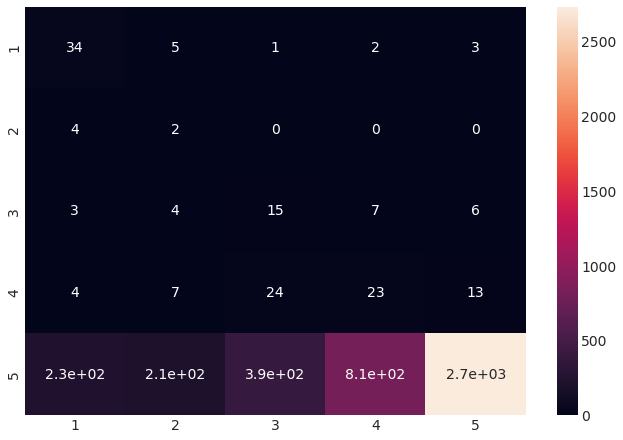

In [92]:
classes = [1, 2, 3, 4, 5]
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("cfm.png")

In [91]:
cfm


array([[  34,    5,    1,    2,    3],
       [   4,    2,    0,    0,    0],
       [   3,    4,   15,    7,    6],
       [   4,    7,   24,   23,   13],
       [ 231,  206,  387,  814, 2732]])

In [93]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
sns.set_style("darkgrid")
#from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import re, string, nltk
#import emoji, bz2
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [94]:
df2 = pd.read_csv('/processed_reviews_split_surnamesWXYZ_minimal.csv')
df2.head(3)

,review_id,text,verified,review_score,product_category
0,product_review_000000,Rainbow Six Vegas 2 was well worth the wait. ...,False,5.0,video_games
1,product_review_000001,Works good.,True,4.0,video_games
2,product_review_000002,Great Product!. Great Product!,True,4.0,NaN


In [95]:
df2.shape

(32917, 5)

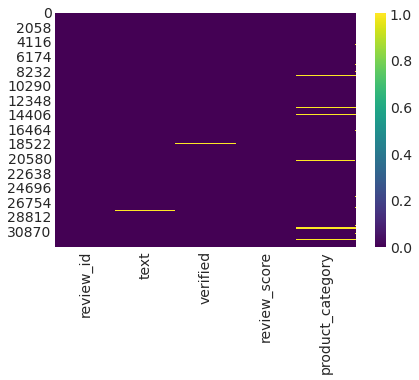

In [96]:
import seaborn as sns
sns.heatmap(df2.isnull(), cmap = 'viridis')

In [97]:
df2.product_category.isnull().sum()

906

In [98]:
nulls = np.where(df2.product_category.isnull())[0]

In [99]:
df2.drop(nulls, axis = 0, inplace = True)

In [100]:
df2.shape

(32011, 5)

In [101]:
df2.product_category.isnull().sum()

0

In [102]:
df2.text.isna().sum()

13

In [103]:
nan = np.where(df2.text.isna())[0]

In [104]:
df2.drop(nan, axis = 0, inplace = True)

In [105]:
df2.shape

(31998, 5)

In [106]:
df2.head(10)

,review_id,text,verified,review_score,product_category
0,product_review_000000,Rainbow Six Vegas 2 was well worth the wait. ...,False,5.0,video_games
1,product_review_000001,Works good.,True,4.0,video_games
3,product_review_000003,"Other than metal shredders, I think most playe...",True,5.0,musical_instruments
4,product_review_000004,For those who may be too young to remember or ...,False,5.0,video_games
5,product_review_000005,"Well, ive played like 75% of the game so far, ...",True,3.0,video_games
6,product_review_000006,I don't play guitar myself; I got these as a g...,True,4.0,musical_instruments
7,product_review_000007,"At first my signal was weak, but now its is st...",False,4.0,video_games
8,product_review_000008,It doesn't say but it is Steam game..,True,3.0,video_games
9,product_review_000009,This was the first Ace Combat game that I ever...,False,4.0,video_games
10,product_review_000010,"Protects well, but loose around buttons. Could...",True,4.0,video_games


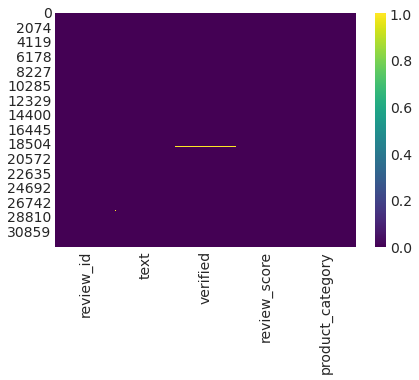

In [107]:
sns.heatmap(df2.isnull(), cmap = 'viridis')

In [108]:
df2 = df2[['text', 'product_category']]
df2.head()

,text,product_category
0,Rainbow Six Vegas 2 was well worth the wait. ...,video_games
1,Works good.,video_games
3,"Other than metal shredders, I think most playe...",musical_instruments
4,For those who may be too young to remember or ...,video_games
5,"Well, ive played like 75% of the game so far, ...",video_games


In [109]:
df2.product_category.unique()

array(['video_games', 'musical_instruments'], dtype=object)

In [110]:
df3 = df2.replace('video_games', 0)

In [111]:
df3 = df2.replace('video_games', 0)

In [112]:
df = df3.replace('musical_instruments', 1)

In [113]:
df

,text,product_category
0,Rainbow Six Vegas 2 was well worth the wait. ...,0
1,Works good.,0
3,"Other than metal shredders, I think most playe...",1
4,For those who may be too young to remember or ...,0
5,"Well, ive played like 75% of the game so far, ...",0
...,...,...
32912,"As large ultex thumb picks goes,\n1 these felt...",1
32913,From the ring to the parking lot all the way t...,0
32914,Bien.,0
32915,I love this game. Brings me back to my childho...,0


In [114]:
df.duplicated().sum()

1840

In [115]:
df.drop_duplicates(keep = 'first', inplace = True)

In [116]:
df.duplicated().sum()

0

In [117]:
df.shape

(30158, 2)

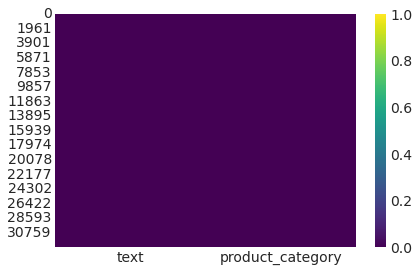

In [118]:
sns.heatmap(df.isnull(), cmap = 'viridis')

In [119]:
def clean_text(df, field):
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.replace("#[^a-zA-Z0-9_]+"," ")
    df[field] = df[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    df[field] = df[field].str.replace(r"http\S+","")
    df[field] = df[field].str.lower()
    return df

clean_text(df,"text")

,text,product_category
0,rainbow six vegas was well worth the wait ...,0
1,works good,0
3,"other than metal shredders, i think most playe...",1
4,for those who may be too young to remember or ...,0
5,"well, ive played like of the game so far, ...",0
...,...,...
32912,"as large ultex thumb picks goes,\n these felt...",1
32913,from the ring to the parking lot all the way t...,0
32914,bien,0
32915,i love this game brings me back to my childho...,0


In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords

import os
#print(os.listdir("../input"))

In [121]:
#pip install emoji
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [122]:
pip install emoji

In [123]:
import emoji
# Applying Lemmmatizer to remove tenses from texts.
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r"won\'t", "will not", str(text))
    text = re.sub(r"can\'t", "can not", str(text))
    text = re.sub('[^a-zA-Z0-9]',' ',str(text))
    text= re.sub(emoji.get_emoji_regexp(),"",str(text))
    text = [lemmatizer.lemmatize(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text


In [124]:
df.head()

,text,product_category
0,rainbow six vegas was well worth the wait ...,0
1,works good,0
3,"other than metal shredders, i think most playe...",1
4,for those who may be too young to remember or ...,0
5,"well, ive played like of the game so far, ...",0


In [125]:
df['cleaned_text'] = df.text.apply(preprocess_text)

In [126]:
df_ct = df[['product_category', 'cleaned_text']]
df_ct

,product_category,cleaned_text
0,0,rainbow six vega well worth wait graphic much ...
1,0,work good
3,1,metal shredder think player find particular se...
4,0,may young remember perhaps missed ne snes gene...
5,0,well ive played like game far ive found decent...
...,...,...
32912,1,large ultex thumb pick go felt snug others gol...
32913,0,ring parking lot way street madison square gar...
32914,0,bien
32915,0,love game brings back childhood although graph...


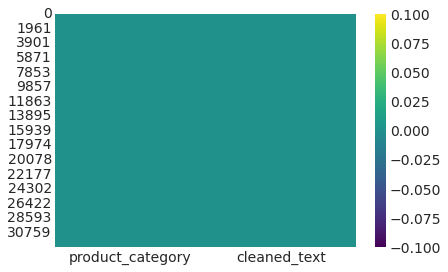

In [127]:
sns.heatmap(df_ct.isnull(), cmap = 'viridis')

In [128]:
X_train2, X_rest2, y_train2, y_rest2 = train_test_split(np.array(df_ct["cleaned_text"]),np.array(df_ct["product_category"]), test_size=0.25,random_state=49)
print(X_train2.shape)
print(X_rest2.shape)

(22618,)
(7540,)


In [129]:
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_rest2, y_rest2, test_size = 0.5, random_state = 49)
X_test2.shape, X_valid2.shape

((3770,), (3770,))

In [130]:
X_train2[0], X_valid2[0]

('game pretty good like wave runner might game looking complaint',
 'bought one saw cremona sv around thought got good deal bit disappointed received first chinrest shown item picture amazon com smaller piece attached left side tailpiece instead top endpin called guarneri therefore cover end tailpiece indication overall lower quality cheap paint job overall appearance body also impressive bow fewer hair would like see rosin bit broken edge like dropped ground someone already tuning harder peg bit slippery apply peg drop make work however big issue least enough return violin string decent initial sound bit scratchy bad decided keep update sound quality violin break update bow broke several month use bow hair came bow tip surprising weak bow start good thing amazon replaced whole violin new one realize case although nicely made one bow holder therefore put back bow case another problem space shoulder rest inside although bigger outside previous violin case therefore case practical update

In [131]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2 = TfidfVectorizer(use_idf=True, tokenizer=word_tokenize)
X_train2_tf2 = tfidf2.fit_transform(X_train2)
X_valid2_tf2 = tfidf2.transform(X_valid2)
X_test2_tf2 = tfidf2.transform(X_test2)

In [133]:
X_train2_tf2.shape, X_valid2_tf2.shape, X_test2_tf2.shape

((22618, 37043), (3770, 37043), (3770, 37043))

In [134]:
y_train2 = np.asarray(y_train2).astype('float32')
y_valid2 = np.asarray(y_valid2).astype('float32')
y_test2 = np.asarray(y_test2).astype('float32')
print("y_train ", y_train2.shape)
print("y_valid ", y_valid2.shape)
print("y_test ", y_test2.shape)

y_train  (22618,)
y_valid  (3770,)
y_test  (3770,)


In [135]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train2)

In [136]:
X_train2_seq = tokenizer.texts_to_sequences(X_train2)
X_valid2_seq = tokenizer.texts_to_sequences(X_valid2)
X_test2_seq = tokenizer.texts_to_sequences(X_test2)

In [137]:
X_train2_seq_padded = pad_sequences(X_train2_seq)
X_valid2_seq_padded = pad_sequences(X_valid2_seq)
X_test2_seq_padded = pad_sequences(X_test2_seq)

In [138]:
np.set_printoptions(threshold=np.inf)

In [139]:
from sklearn.metrics import accuracy_score, classification_report

In [140]:
clf_rf_0 = RandomForestClassifier(n_estimators = 100, max_features= 'auto', random_state = 0).fit(X_train2_tf2, y_train2)
y_hat_train2_1 = clf_rf_0.predict(X_train2_tf2)
y_hat_valid2_1 = clf_rf_0.predict(X_valid2_tf2)
print("The validation score for 100 estimators: ", clf_rf_0.score(X_valid2_tf2, y_valid2))
print("The training score for 100 estimators: ", clf_rf_0.score(X_train2_tf2, y_train2))

The validation score for 100 estimators:  0.9241379310344827
The training score for 100 estimators:  0.9960650809090105


In [141]:
clf_rf_1 = RandomForestClassifier(n_estimators = 300, max_features= 'auto', random_state = 0).fit(X_train2_tf2, y_train2)
y_hat_train2_2 = clf_rf_1.predict(X_train2_tf2)
y_hat_valid2_2 = clf_rf_1.predict(X_valid2_tf2)
print("The validation score for 300 estimators: ", clf_rf_1.score(X_valid2_tf2, y_valid2))
print("The training score for 300 estimators: ", clf_rf_1.score(X_train2_tf2, y_train2))

The validation score for 300 estimators:  0.9257294429708223
The training score for 300 estimators:  0.9960650809090105


In [142]:
clf_rf_2 = RandomForestClassifier(n_estimators = 500, max_features= 'auto', random_state = 0).fit(X_train2_tf2, y_train2)
y_hat_train2_3 = clf_rf_2.predict(X_train2_tf2)
y_hat_valid2_30 = clf_rf_2.predict(X_valid2_tf2)
print("The validation score for 500 estimators: ", clf_rf_2.score(X_valid2_tf2, y_valid2))
print("The training score for 500 estimators: ", clf_rf_2.score(X_train2_tf2, y_train2))

The validation score for 500 estimators:  0.9259946949602123
The training score for 500 estimators:  0.9960650809090105


In [143]:
clf_rf_3 = RandomForestClassifier(n_estimators = 700, max_features= 'auto', random_state = 0).fit(X_train2_tf2, y_train2)
y_hat_train2_3 = clf_rf_3.predict(X_train2_tf2)
y_hat_valid2_3 = clf_rf_3.predict(X_valid2_tf2)
print("The validation score for 700 estimators: ", clf_rf_3.score(X_valid2_tf2, y_valid2))
print("The training score for 700 estimators: ", clf_rf_3.score(X_train2_tf2, y_train2))

The validation score for 700 estimators:  0.926525198938992
The training score for 700 estimators:  0.9960650809090105


In [144]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
naive = MultinomialNB()
naive.fit(X_train2_tf2, y_train2)

MultinomialNB()

In [145]:
naive1 = BernoulliNB()
naive1.fit(X_train2_tf2, y_train2)

BernoulliNB()

In [146]:
naive2 = ComplementNB()
naive2.fit(X_train2_tf2, y_train2)

ComplementNB()

In [147]:
n_pred = naive.predict(X_valid2_tf2)

In [148]:
n_pred1 = naive1.predict(X_valid2_tf2)

In [149]:
n_pred2 = naive2.predict(X_valid2_tf2)

In [150]:
accuracy_score(n_pred, y_valid2)

0.9151193633952255

In [151]:
accuracy_score(n_pred1, y_valid2)

0.7177718832891247

In [152]:
accuracy_score(n_pred2, y_valid2)

0.9344827586206896

In [156]:
print(X_test2[50], y_test2[50])
print('\n')
print('The original score was ', y_test2[50], 'and the predicted score was ', naive2.predict(X_test2_tf2[50]))

finally playing sims taken away much l miss bunk bead kid ability drive see going destination l upset creator sims much better well maybe bring another expansion pack luxury upset creator sims much better well maybe bring another 0.0


The original score was  0.0 and the predicted score was  [0.]


In [157]:
print(X_test2[150], y_test2[150])
print('\n')
print('The original score was ', y_test2[150], 'and the predicted score was ', naive2.predict(X_test2_tf2[150]))

another mid range wireless besides fact kind worked quality lame always slight delay would get foot unit back day purchased high end shure wireless system best get spent well unit shure unit time always use best cable money buy feel truest signal get guitar amp important unit sound good better cable ever used far gotten chance play square footage home go anywhere property sound amazing delay anything bottom line far best wireless unit ever played incredible 1.0


The original score was  1.0 and the predicted score was  [1.]


In [158]:
print(X_test2[250], y_test2[250])
print('\n')
print('The original score was ', y_test2[250], 'and the predicted score was ', naive2.predict(X_test2_tf2[250]))

pedal cheap basicly good sim racing ok kid motor powerful entangle hair rip careful wheel feel fine great gt need better pedal 0.0


The original score was  0.0 and the predicted score was  [0.]


In [159]:
print(X_test2[350], y_test2[350])
print('\n')
print('The original score was ', y_test2[350], 'and the predicted score was ', naive2.predict(X_test2_tf2[350]))

love game bug mean save lot good game game make really think hard figure need lot false clue lying place next installment l going even better elimanated time limit mean investigate heart content without worry pulled case able redo interview people instance game ask maintenance worker move cart move forward game cart something need identify victim l redo conversation without either start begin save point wait new game look better first awesome really fun 0.0


The original score was  0.0 and the predicted score was  [0.]


In [160]:
print(X_test2[450], y_test2[450])
print('\n')
print('The original score was ', y_test2[450], 'and the predicted score was ', naive2.predict(X_test2_tf2[450]))

loved game played several adventure game right amount everything get interaction character puzzels hunting clue putting item together story well played spooky factor give plenty interest way thru would recommend game anyone best adventure game yet 0.0


The original score was  0.0 and the predicted score was  [0.]


In [161]:
print(X_test2[510], y_test2[510])
print('\n')
print('The original score was ', y_test2[510], 'and the predicted score was ', naive2.predict(X_test2_tf2[510]))

always loved fallout bought xbox one play backward compatibility great rpg visit 0.0


The original score was  0.0 and the predicted score was  [0.]


In [162]:
print(X_test2[20], y_test2[20])
print('\n')
print('The original score was ', y_test2[20], 'and the predicted score was ', naive2.predict(X_test2_tf2[20]))

kid love 0.0


The original score was  0.0 and the predicted score was  [0.]


In [163]:
print(X_test2[570], y_test2[570])
print('\n')
print('The original score was ', y_test2[570], 'and the predicted score was ', naive2.predict(X_test2_tf2[570]))

installation fast easy game great would recommend anyone like realistic combat flight simulator wanted 0.0


The original score was  0.0 and the predicted score was  [0.]


In [164]:
print(X_test2[70], y_test2[70])
print('\n')
print('The original score was ', y_test2[70], 'and the predicted score was ', naive2.predict(X_test2_tf2[70]))

dude play trust love 0.0


The original score was  0.0 and the predicted score was  [0.]


In [165]:
print(X_test2[11], y_test2[11])
print('\n')
print('The original score was ', y_test2[11], 'and the predicted score was ', naive2.predict(X_test2_tf2[11]))

since discovering handy adapter purchased least use every mic make easy mic swapping studio solves headache constantly screwing mic clip stand never leave home without 1.0


The original score was  1.0 and the predicted score was  [1.]


In [166]:
from sklearn.metrics import confusion_matrix, roc_auc_score

In [168]:
cfm = (confusion_matrix(n_pred2, y_valid2))

In [169]:
cfm

array([[2457,  145],
       [ 102, 1066]])

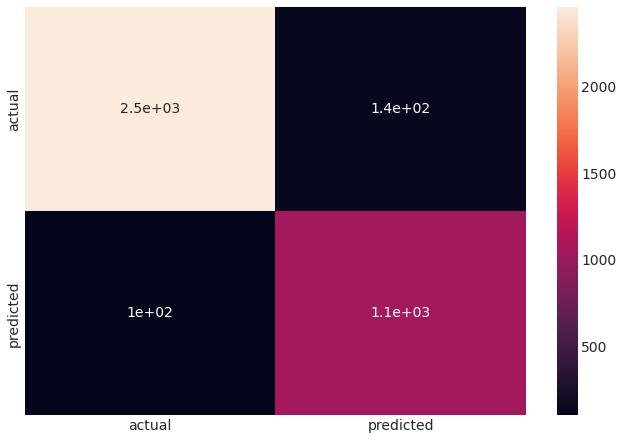

In [170]:
classes = ['actual', 'predicted']
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("cfm.png")